## CREAR UNA IMAGEN DE COLOR ANARANJADO


### Importar librerias

In [2]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

%matplotlib inline  

plt.rcParams['figure.figsize'] = [10,5]

### Creamos los 3 componentes de la imagen 

- (R,G,B) = (255,128,0)


In [4]:
np.ones((3,4))
np.zeros((3,4))

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [ ]:
size_image = 100
R = np.ones((size_image,size_image))*255
G = np.ones((size_image,size_image))*128
B = np.ones((size_image,size_image))*0

### Concatenamos los 3 componentes

In [5]:
imagen = np.dstack((R,G,B)) 
imagen = np.array(imagen,dtype=int)
imagen.shape

(100, 100, 3)

In [6]:
np.min(imagen)

0

###  Ploteando imagen

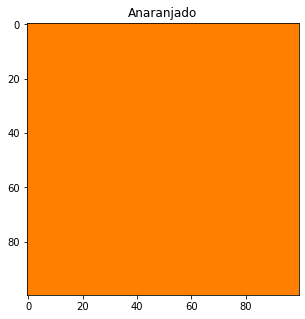

In [7]:
# Ploteando la imagen total
plt.figure()
plt.imshow(imagen)
plt.title('Anaranjado')
plt.show()

### Umbralización

In [5]:
ls

cancer.jpg*              CLASE 2.pptx*  segmentacion.png*
celula_cancerigena.png*  ejemplo.jpg*   Untitled1.ipynb
Clase 2.ipynb*           lena.jpg*      Untitled.ipynb


# READ IMAGES

In [7]:
# cv2.imread('')  ->  BGR
# plt.imread('')  ->  RGB

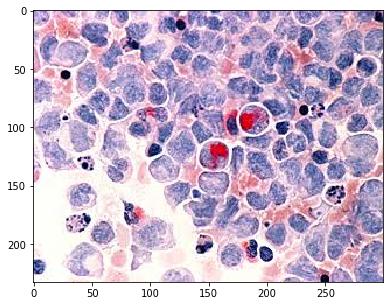

In [63]:
#cancer_image = plt.imread('cancer.jpg')
cancer_image_bgr = cv2.imread('cancer.jpg') # BGR

# transformar la imagen
cancer_image     = cv2.cvtColor(cancer_image_bgr,cv2.COLOR_BGR2RGB)
# MOSTRAR IMAGES

plt.imshow(cancer_image)
plt.show()

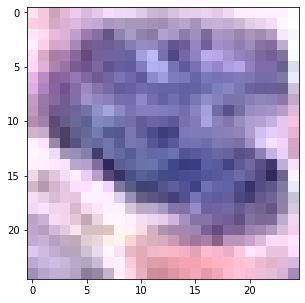

In [119]:
plt.imshow(cancer_image[10:35,40:65,:])
plt.show()

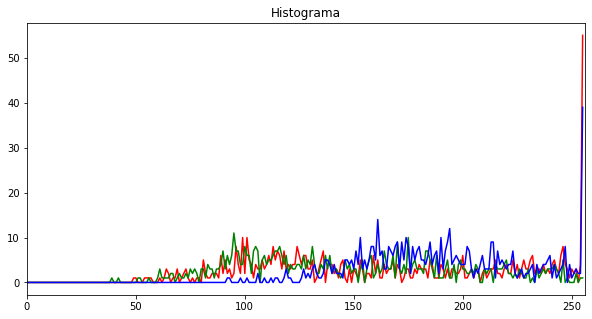

In [128]:
celula_cancerigena = cancer_image[10:35,40:65,:]
plt.imsave('celula_cancerigena.png',celula_cancerigena)
img_celula = plt.imread('celula_cancerigena.png')
color = ('r','g','b')
for channel,col in enumerate(color):
    histr = cv2.calcHist([img_celula*255],[channel],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.title('Histograma')
plt.show()


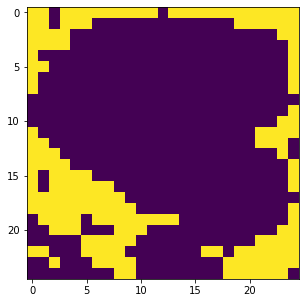

In [130]:

R_celula = img_celula[:,:,0]*255
G_celula = img_celula[:,:,1]*255
B_celula = img_celula[:,:,2]*255

# UMBRALIZACION
R_celula = R_celula>200
G_celula = G_celula>100
B_celula = B_celula>200

binary_celula = np.array(R_celula*G_celula*B_celula*255,dtype=int)

plt.imshow(binary_celula)
plt.show()

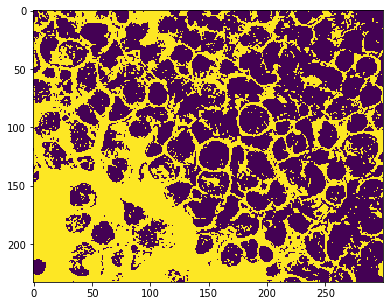

In [127]:
img_celula = plt.imread('cancer.jpg')

R_celula = img_celula[:,:,0]
G_celula = img_celula[:,:,1]
B_celula = img_celula[:,:,2]

# UMBRALIZACION
R_celula = R_celula>200
G_celula = G_celula>100
B_celula = B_celula>200

binary_celula = np.array(R_celula*G_celula*B_celula*255,dtype=int)

plt.imshow(binary_celula)
plt.show()
plt.imsave('segmentacion.png',binary_celula)

## SUAVISADO

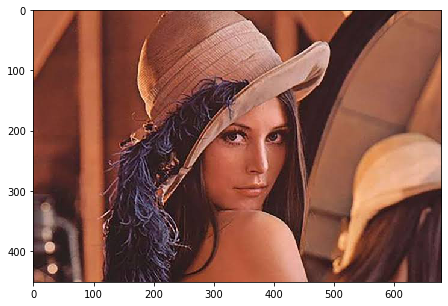

In [14]:
lena_img = plt.imread('lena.jpg')
plt.imshow(lena_img)
plt.show()


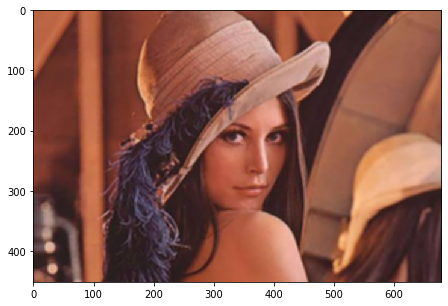

In [15]:
import cv2
import numpy as np

lena_img = plt.imread("lena.jpg")
gaussian = cv2.GaussianBlur(lena_img,(5,5),cv2.BORDER_DEFAULT)

plt.imshow(gaussian)
plt.show()

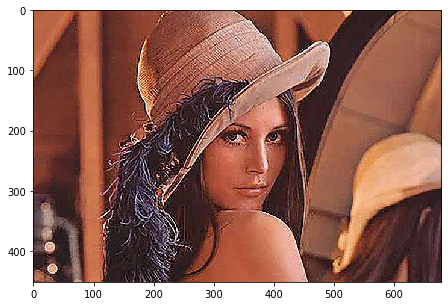

In [16]:
kernel_sharpening = np.array([[0,-1,0], 
                              [-1, 5,-1],
                              [0,-1,0]])
sharpened = cv2.filter2D(lena_img, -1, kernel_sharpening)
plt.imshow(sharpened)
plt.show()


In [17]:
ls

 cancer.jpg              'CLASE 2.gslides'   ejemplo.jpg   segmentacion.png
 celula_cancerigena.png  'Clase 2.ipynb'     lena.jpg


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in log


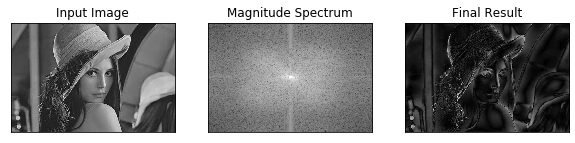

In [18]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('lena.jpg',0)

# fft to convert the image to freq domain 
f = np.fft.fft2(img)

# shift the center
fshift = np.fft.fftshift(f)

rows, cols = img.shape
crow,ccol = rows//2 , cols//2

# remove the low frequencies by masking with a rectangular window of size 60x60
# High Pass Filter (HPF)

fshift[crow-5:crow+5, ccol-5:ccol+5] = 0

# shift back (we shifted the center before)
f_ishift = np.fft.ifftshift(fshift)

# inverse fft to get the image back 
img_back = np.fft.ifft2(f_ishift)

img_back = np.abs(img_back)

magnitude_spectrum = 20*np.log(np.abs(fshift))

       

plt.subplot(131),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(img_back,cmap = 'gray')
plt.title('Final Result'), plt.xticks([]), plt.yticks([])

plt.show()

## Rotación de imágenes

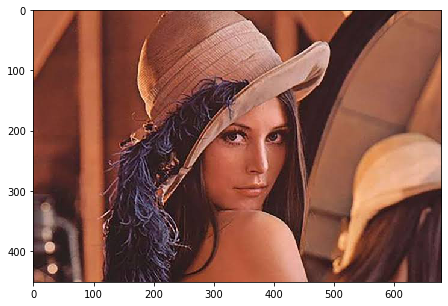

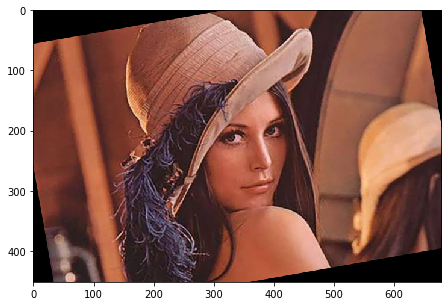

In [19]:
import imutils
plt.imshow(lena_img)
plt.show()
angle = 10
rotated = imutils.rotate(lena_img, angle)
plt.imshow(rotated)
plt.show()

In [ ]:

theta = 15*np.pi/180
m_rotation = [[np.cos(theta),np.sin(theta),0],
              [-np.sin(theta),np.cos(theta),0],
              [0,0,1]]
m_rotation = np.array(m_rotation)

In [ ]:
def rotate_channel(img):
  (x_size,y_size) = img.shape
  img_new = np.zeros((x_size,y_size))
  for i in range(0,x_size):
    for j in range(0,y_size):
      xy = np.array([i-450//2,j-650//2,0])
      vector = xy.dot(m_rotation)
      x_new = int(vector[0])+450//2
      y_new = int(vector[1])+650//2
      if(x_new<x_size and y_new<y_size):
        img_new[x_new,y_new] = img[i,j]
  return img_new

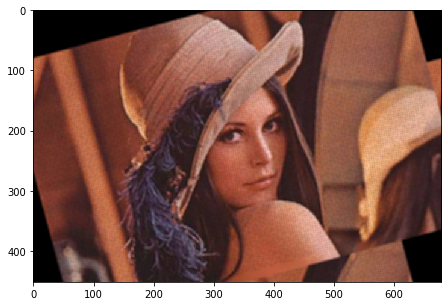

In [31]:
R_lena2 = lena_img[:,:,0]
G_lena2 = lena_img[:,:,1]
B_lena2 = lena_img[:,:,2]

R_lena2_rotated = rotate_channel(R_lena2)
G_lena2_rotated = rotate_channel(G_lena2)
B_lena2_rotated = rotate_channel(B_lena2)


imagen = np.dstack((R_lena2_rotated,G_lena2_rotated,B_lena2_rotated)) 
imagen = np.array(imagen,dtype=int)
imagen = cv2.GaussianBlur(np.array(imagen,dtype=np.uint8),(5,5),cv2.BORDER_DEFAULT)

plt.imshow(imagen)
plt.show()